In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [3]:
wine_dataset = pd.read_csv('winequality-red.csv')
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dataset.shape

(1599, 12)

In [5]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# No null values in dataset.

In [6]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Count wine in each quality category in the dataset.

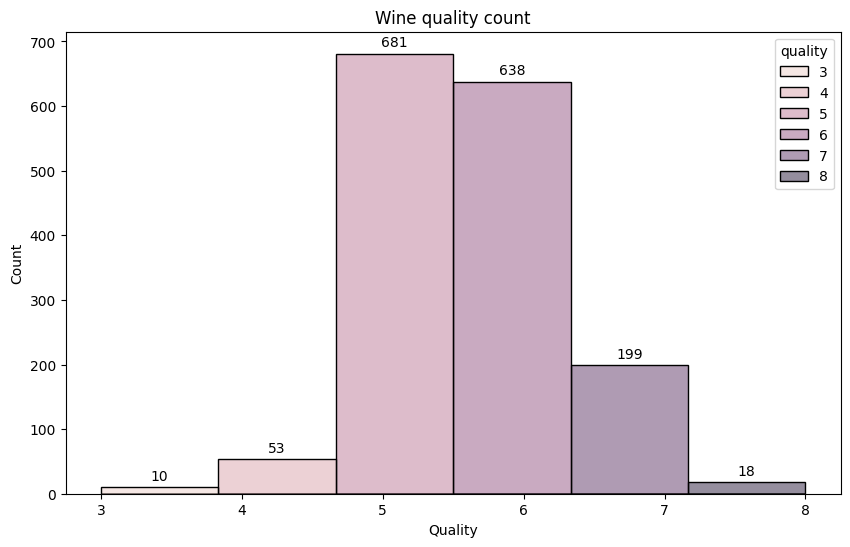

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data = wine_dataset, x = 'quality', bins = 6, hue='quality')
for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{int(x)}' if x != 0 else '', label_type='edge', padding=3)
plt.title('Wine quality count')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [8]:
correlation = wine_dataset.corr(numeric_only = True)

<Axes: >

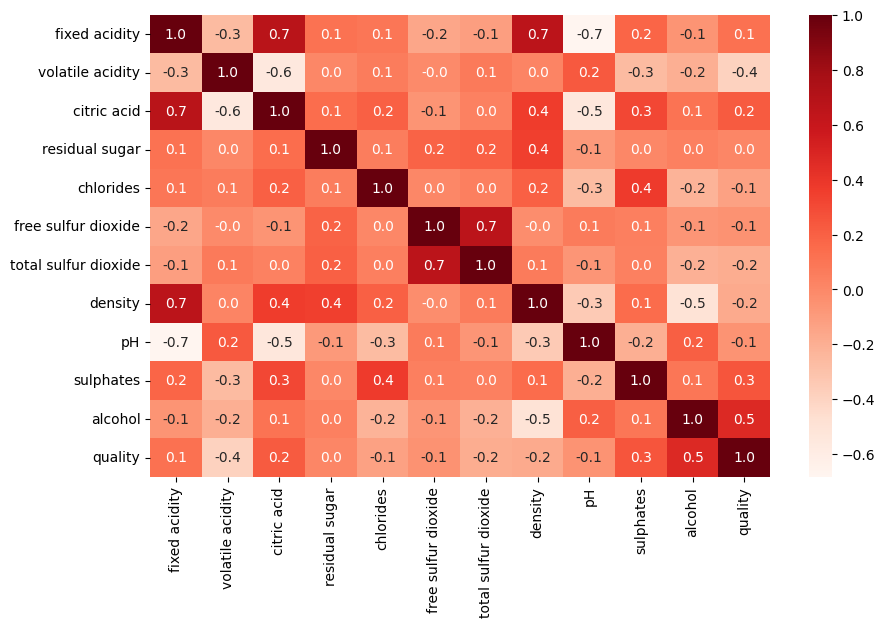

In [9]:
plt.figure(figsize = (10,6))
sns.heatmap(correlation, cbar=True, fmt='.1f',annot=True, cmap='Reds')

# Quality of wine is inversely proportional to volatile acidity.

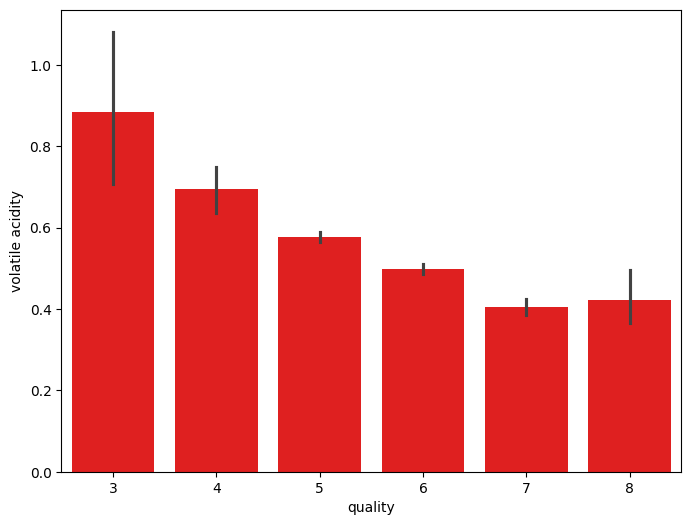

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset, color = 'red')
plt.show()

# Let good wine be wine with a qulaity >= 7.

In [11]:
X = wine_dataset.drop('quality', axis=1)
Y = wine_dataset['quality'].apply(lambda y: 1 if y >= 7 else 0)

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Lets try classifying wine using a voting classifier using logistic reg, random forest clf and support vector machine.

In [15]:
voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42, max_iter = 1000)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(random_state = 42))
    ], voting = 'hard'
)
voting_clf.fit(X_train, Y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [16]:
for name, clf in voting_clf.named_estimators_.items():    
    print(name, "=", clf.score(X_train, Y_train))

lr = 0.8827208756841283
rf = 1.0
svc = 0.8678655199374511


In [17]:
voting_clf.score(X_train, Y_train)

0.9038311180609852

In [18]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [19]:
voting_scores = cross_val_score(voting_clf, X_train, Y_train, cv=kf, scoring='accuracy')
voting_scores.mean()

np.float64(0.885061274509804)

# Lets change voting to soft.

In [20]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, Y_train)
voting_clf.score(X_train, Y_train)

0.9257232212666145

In [21]:
voting_scores = cross_val_score(voting_clf, X_train, Y_train, cv=kf, scoring='accuracy')
voting_scores.mean()

np.float64(0.8858394607843139)

# Using soft voting gives a bit of a better score compared to hard voting.

# Lets even try using multiple decision tree clfs under bagging classification (since random forest was overfitting in previous voting clf).

In [22]:
 from sklearn.ensemble import BaggingClassifier
 from sklearn.tree import DecisionTreeClassifier

In [23]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, n_jobs = -1, random_state = 42,   
oob_score=True)
bag_clf.fit(X_train, Y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [24]:
bag_clf.score(X_train, Y_train)

0.9014855355746677

In [25]:
bag_clf.oob_score_

0.887412040656763

# oob score suggests bag_clf will give a score of around 0.88 for the test set.

In [26]:
bag_clf.score(X_test, Y_test)

0.846875

In [27]:
voting_clf.score(X_test, Y_test)

0.871875

# Lets try using this bagging clf in the voting clf instead of random forest clf.

In [28]:
voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42, max_iter = 1000)),
        ('bg', bag_clf),
        ('svc', SVC(random_state = 42, probability=True))
    ], voting = 'soft'
)
voting_clf.fit(X_train, Y_train)

,estimators,"[('lr', ...), ('bg', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [29]:
for name, clf in voting_clf.named_estimators_.items():    
    print(name, "=", clf.score(X_train, Y_train))

lr = 0.8827208756841283
bg = 0.9014855355746677
svc = 0.8678655199374511


In [30]:
voting_clf.score(X_train, Y_train)

0.8842845973416732

In [31]:
voting_clf.score(X_test, Y_test)

0.85625

# Voting clf with soft voting and random forest clf performed the best with a score of 0.87.